In [384]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [385]:
con_obj = sqlite3.connect("../data/checking-logs.sqlite")

* analyze only the users and not the admins
* create two lists of values (for working days and for weekends) for the histogram
input
* the figsize is still the same, you can choose the fontsize as well as the color palette
* use a level of transparency for the histogram in front equal to 0.7
* at the end of your Jupyter Notebook, create a markdown cell and insert the question:
“Are there hours when the total number of commits was higher on weekends than
on working days?” In your answer, put the top-4 examples.

In [386]:
query = """
  SELECT timestamp as commits
  FROM checker
  WHERE uid LIKE 'user_%'
"""

df = pd.read_sql(sql=query, con=con_obj, parse_dates=["commits"])
weekends = df[df["commits"].dt.weekday >= 5]["commits"].tolist()
working_days = df[df["commits"].dt.weekday < 5]["commits"].tolist()

weekend_hours = [ts.hour for ts in weekends]
working_hours = [ts.hour for ts in working_days]

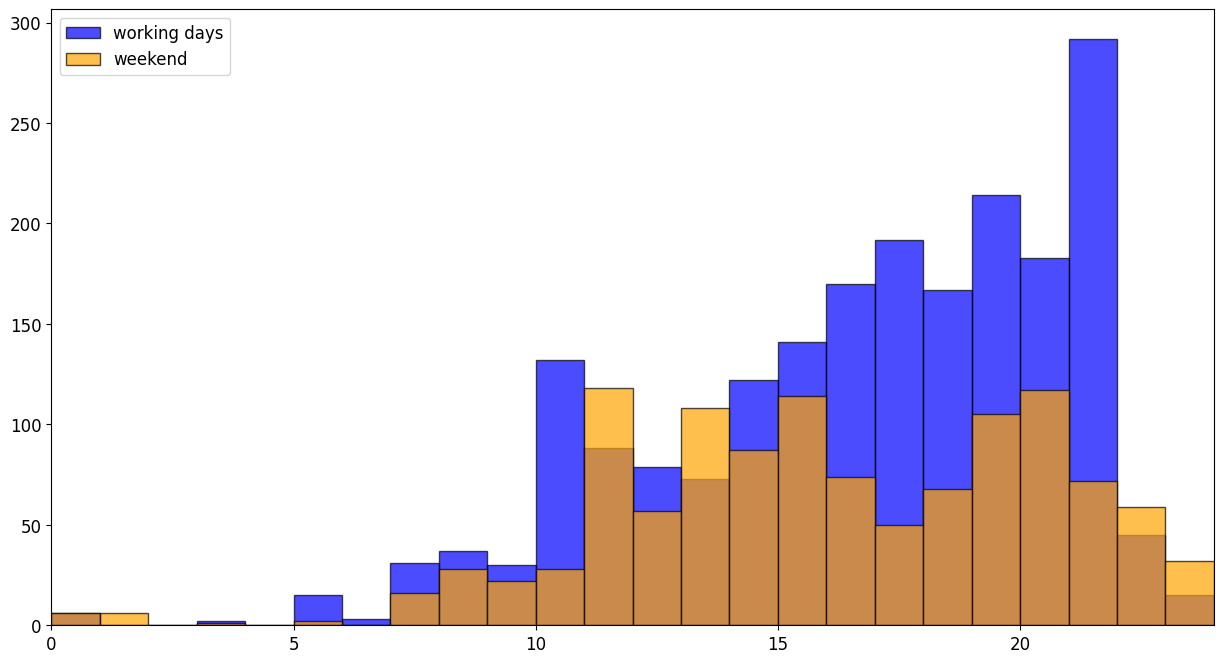

In [387]:
plt.figure(figsize=(15, 8))
plt.rcParams.update({"font.size": 12})  # setting up font size

plt.hist(
    working_hours,
    bins=24,
    range=(0, 24),
    alpha=0.7,
    label="working days",
    color="blue",
    edgecolor="black",
)
plt.hist(
    weekend_hours,
    bins=24,
    range=(0, 24),
    alpha=0.7,
    label="weekend",
    color="orange",
    edgecolor="black",
)
plt.xlim(0, 24)
plt.legend()
plt.show()

“Are there hours when the total number of commits was higher on weekends than on working days?”

- Ответ: 11, 13, 22, 23

In [388]:
con_obj.close()